 ## **Credit Card Fraud Classification with Features Selection and Ensemble Learning**

This is my first Kaggle Contribution, using a very well-rated dataset in the community: the **Credit Card Fraud Dataset**. Sometimes, use all variables in a classification can be time consuming, and create overfitting. The objective of this work is to find, through Feature Selection, the most significant variables for the recognition of credit card fraud patterns, and subsequently to test the efficiency of some Machine Learning models (using this variables) working both separately and together, through Ensemble Learning.

First, the libraries and the dataset for this Notebook are imported[](http://)

In [1]:
# Base Libraries
import matplotlib.pyplot as plt  
import pandas as pd
import numpy as np
from numpy import set_printoptions
from numpy import mean
# Models
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_confusion_matrix

In [2]:
creditcard = pd.read_csv('../input/creditcardfraud/creditcard.csv', sep=',')

creditcard.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0



As we can see, the data set contains the time, 28 references regarding the card's consumption behavior, the amount spent and the binary classification (fraudulent or not). Below, the data is splitted between train and test sets (70/30 classic distribution)

In [3]:
array = creditcard.values
X = array[:,0:30]
Y = array[:,30]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

## Feature Selection (Importance)

Tree-based estimators can be used to compute impurity-based feature importances, which in turn can be used to discard irrelevant features (https://scikit-learn.org/stable/modules/feature_selection.html). This technique will help find the best variables to be used in the models.

In [4]:
# feature extraction
fi = ExtraTreesClassifier(n_estimators=10)
fi.fit(X, Y)
print(fi.feature_importances_)

[0.01550006 0.01298873 0.01238563 0.04741716 0.03261485 0.01691429
 0.01251752 0.02694759 0.0144772  0.03797404 0.06644196 0.11798109
 0.09241356 0.01029416 0.09731916 0.0103854  0.05131613 0.12910747
 0.0627481  0.00956635 0.01028833 0.01526257 0.0125403  0.00943741
 0.01329376 0.01103907 0.01447744 0.01242086 0.01158457 0.01234524]


## Models

For this notebook, three classification models were tested: **K-Nearest Neighbor**, **Random Forest** and **Logistic Regression**, all using the sklearn library. Initially, X and y receive new values, based on the most representative variables found by Feature Selection.

In [5]:
array = creditcard.values
X = array[:, [17,14,10,12,11]]
Y = array[:,30]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

### K-Nearest Neighbor

Classifier implementing the k-nearest neighbors vote (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). First, a new kNN model is created, then we create a dictionary of all values we want to test for n_neighbors. GridSearch is used to test all values for n_neighbors, and finally we fit the model to the training data.

In [6]:
knn = KNeighborsClassifier(algorithm='auto')
params_knn = {
    'n_neighbors': (1,30, 1),
    'leaf_size': (20,40,1),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev')}
knn_gs = GridSearchCV(
    estimator=knn,
    param_grid=params_knn,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5)

%time knn_gs.fit(X_train, y_train)
y_pred = knn_gs.predict(X_test)

CPU times: user 1.46 s, sys: 171 ms, total: 1.63 s
Wall time: 10min 22s


Here, the best model is saved and the best parameters are shown, together with model's Area Under the Curve (AUC - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html). 

In [7]:
knn_best = knn_gs.best_estimator_
print(knn_gs.best_params_)
fpr, tpr, _ = roc_curve(y_test, y_pred)

knn_auc = auc(fpr, tpr)

{'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 30, 'p': 2, 'weights': 'distance'}


### Random Forest

A Random Forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control overfitting (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). Below, we create a new Random Forest Classifier, a dictionary of all values we want to test for n_estimators and we use gridsearch to test all values for n_estimators, finally fitting the model to training data.

In [8]:
rf = RandomForestClassifier()
params_rf = {"n_estimators": np.arange(1,30,1)}
rf_gs = GridSearchCV(rf, params_rf, cv=5)

%time rf_gs.fit(X_train, y_train)
y_pred = rf_gs.predict(X_test)

CPU times: user 16min 32s, sys: 681 ms, total: 16min 33s
Wall time: 16min 44s


Here, the best model is saved and the best parameters are shown, together with model's Area Under the Curve (AUC - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html). 

In [9]:
rf_best = rf_gs.best_estimator_
print(rf_gs.best_params_)

fpr, tpr, _ = roc_curve(y_test, y_pred)

rf_auc = auc(fpr, tpr) 

{'n_estimators': 26}


### Logistic Regression

This class implements regularized logistic regression using the ‘liblinear’ library, ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ solvers. Note that regularization is applied by default. It can handle both dense and sparse input. Use C-ordered arrays or CSR matrices containing 64-bit floats for optimal performance (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Here, we create a new logistic regression model and just fit the model to the training data

In [10]:
log_reg = LogisticRegression(max_iter=1000)
%time log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

CPU times: user 255 ms, sys: 2 ms, total: 257 ms
Wall time: 304 ms


Here, the best model is saved and the best parameters are shown, together with model's Area Under the Curve (AUC - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html). 

In [11]:
fpr, tpr, _ = roc_curve(y_test, y_pred)

lr_auc = auc(fpr, tpr)

## Ensemble (Voting/Stacking Classifiers)

The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator (https://scikit-learn.org/stable/modules/ensemble.html). Below, we create a dictionary of our models

In [12]:
estimators=[("knn", knn_best), ("rf", rf_best), ("log_reg", log_reg)]

### Voting Classifier

The idea behind the VotingClassifier is to combine conceptually different machine learning classifiers and use a majority vote or the average predicted probabilities (soft vote) to predict the class labels. Such a classifier can be useful for a set of equally well performing model in order to balance out their individual weaknesses (https://scikit-learn.org/stable/modules/ensemble.html). Here, we create our voting classifier, inputing our models, fit on training and test our model in data.

In [13]:
ensemble_class = VotingClassifier(estimators, voting="hard")

ensemble_class.fit(X_train, y_train)

ensemble_class.score(X_test, y_test)
y_pred = ensemble_class.predict(X_test)

Here, the best model is saved and the best parameters are shown, together with model's Area Under the Curve (AUC - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html). 

In [14]:
fpr, tpr, _ = roc_curve(y_test, y_pred)

ensemble_class_auc = auc(fpr, tpr) 

### Stacking Classifier

Stacked generalization is a method for combining estimators to reduce their biases. More precisely, the predictions of each individual estimator are stacked together and used as input to a final estimator to compute the prediction. This final estimator is trained through cross-validation (https://scikit-learn.org/stable/modules/ensemble.html). Here, we create our stacking classifier, inputing our models, fit on training and test our model in data.

In [15]:
ensemble_stack = StackingClassifier(estimators=estimators)

ensemble_stack.fit(X_train, y_train)

ensemble_stack.score(X_test, y_test)
y_pred = ensemble_stack.predict(X_test)

Here, the best model is saved and the best parameters are shown, together with model's Area Under the Curve (AUC - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html). 

In [16]:
fpr, tpr, _ = roc_curve(y_test, y_pred)

ensemble_stack_auc = auc(fpr, tpr)

## Model Metrics

In this section, all models are compared and its results shown. Considering the score, all models are very similar, so we need more metrics to see its differences.

In [17]:
print("KNN Score: {}".format(knn_best.score(X_test, y_test)))
print("RF Score: {}".format(rf_best.score(X_test, y_test)))
print("Log_Reg Score: {}".format(log_reg.score(X_test, y_test)))
print("Ensemble Voting Score: {}".format(ensemble_class.score(X_test, y_test)))
print("Ensemble Stacking Score: {}".format(ensemble_stack.score(X_test, y_test)))

KNN Score: 0.999403110845827
RF Score: 0.9994148145547324
Log_Reg Score: 0.9990754069964772
Ensemble Voting Score: 0.999403110845827
Ensemble Stacking Score: 0.9994382219725431


When using AUC, it is possible to see that the objective was achieved: to find a percentage of precision using only the variables chosen by the Feature Selection (which possibly also decreased overfitting). Of all models, kNN had the best results (89.52%), while Logistic Regression was the one with the worst (77.69%)

In [18]:
print("KNN AUC: {}".format(knn_auc))
print("RF AUC: {}".format(rf_auc))
print("Log_Reg AUC: {}".format(lr_auc))
print("Ensemble Voting AUC: {}".format(ensemble_class_auc))
print("Ensemble Stacking AUC: {}".format(ensemble_stack_auc))

KNN AUC: 0.881662964623572
RF AUC: 0.871551277521733
Log_Reg AUC: 0.7904408863990317
Ensemble Voting AUC: 0.8681728991433546
Ensemble Stacking AUC: 0.8614454524282181


This plotted results present well the difference between the models.

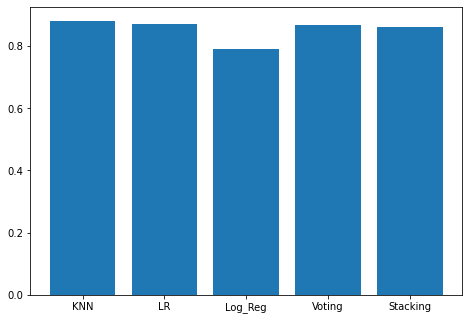

In [19]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
models = ['KNN', 'LR', 'Log_Reg', 'Voting', 'Stacking']
values = [knn_auc, rf_auc, lr_auc, ensemble_class_auc, ensemble_stack_auc]
ax.bar(models, values)
plt.show()

The confusion matrix shows that the classification of the model is quite efficient, with a high accuracy of true positives and negatives

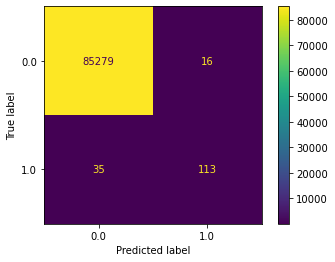

In [20]:
plot_confusion_matrix(knn_gs, X_test, y_test)  
plt.show() 